In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# # Machine Learning libraries
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error
# import tensorflow as tf

In [3]:
file_path = 'Resources/US_Accidents_Main.csv'
df = pd.read_csv(file_path, na_filter=False)

C:\Users\tiffa\AppData\Local\Temp\ipykernel_19912\3112131176.py:2: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, na_filter=False)


In [4]:
df.count()

ID                       7728394
Source                   7728394
Severity                 7728394
Start_Time               7728394
End_Time                 7728394
Start_Lat                7728394
Start_Lng                7728394
End_Lat                  7728394
End_Lng                  7728394
Distance(mi)             7728394
Description              7728394
Street                   7728394
City                     7728394
County                   7728394
State                    7728394
Zipcode                  7728394
Country                  7728394
Timezone                 7728394
Airport_Code             7728394
Weather_Timestamp        7728394
Temperature(F)           7728394
Wind_Chill(F)            7728394
Humidity(%)              7728394
Pressure(in)             7728394
Visibility(mi)           7728394
Wind_Direction           7728394
Wind_Speed(mph)          7728394
Precipitation(in)        7728394
Weather_Condition        7728394
Amenity                  7728394
Bump      

In [5]:
df.head(2)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,,,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,,,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day


In [6]:
df.shape

(7728394, 46)

In [7]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [8]:
df.State.value_counts()

CA    1741433
FL     880192
TX     582837
SC     382557
NY     347960
NC     338199
VA     303301
PA     296620
MN     192084
OR     179660
AZ     170609
GA     169234
IL     168958
TN     167388
MI     162191
LA     149701
NJ     140719
MD     140417
OH     118115
WA     108221
AL     101044
UT      97079
CO      90885
OK      83647
MO      77323
CT      71005
IN      67224
MA      61996
WI      34688
KY      32254
NE      28870
MT      28496
IA      26307
AR      22780
NV      21665
KS      20992
DC      18630
RI      16971
MS      15181
DE      14097
WV      13793
ID      11376
NM      10325
NH      10213
WY       3757
ND       3487
ME       2698
VT        926
SD        289
Name: State, dtype: int64

In [9]:
az_df = df[df.State=='AZ'].copy()
az_df[:2]

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
512261,A-512276,Source2,2,2022-09-07 16:28:13,2022-09-07 22:29:41,35.221779,-114.126457,,,0.0,...,False,False,False,False,False,False,Day,Day,Day,Day
512526,A-512566,Source2,2,2022-09-08 07:11:44,2022-09-08 07:40:58,33.602829,-112.252823,,,0.0,...,False,False,False,False,False,False,Day,Day,Day,Day


In [10]:
az_df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [11]:
az_df['Date'] = az_df.Weather_Timestamp.replace('\s.*', '', regex=True)
az_df.sort_values('Date',inplace=True)

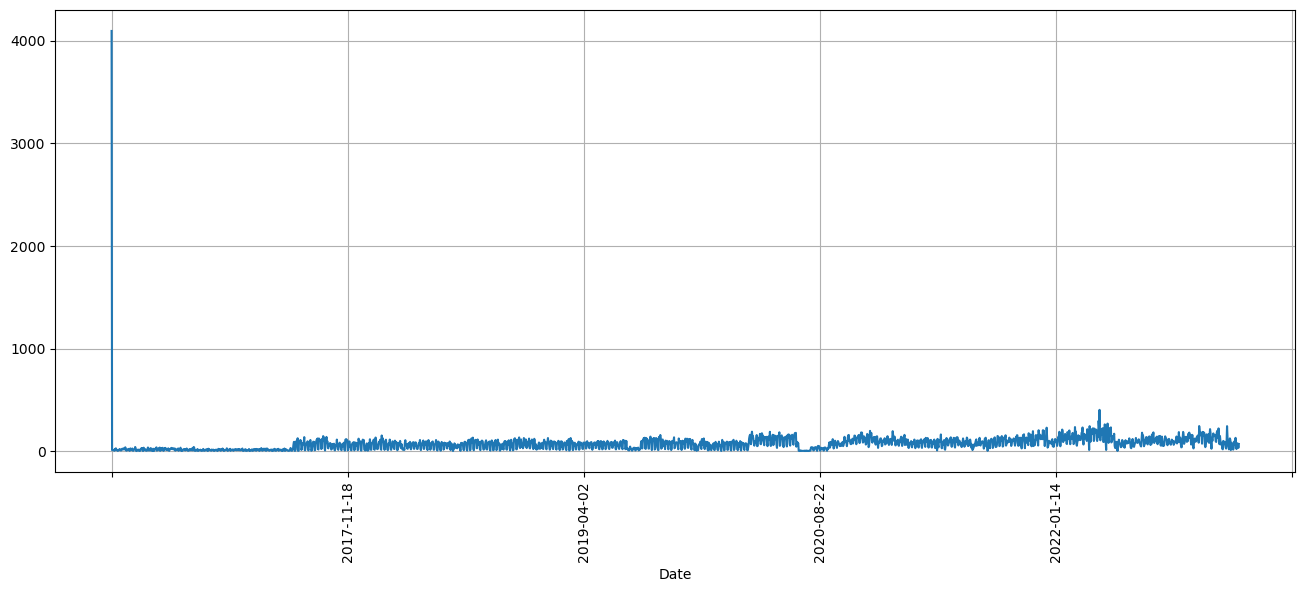

In [12]:
az_df.groupby('Date').size().plot(rot=90, figsize=[16,6],grid=True);